In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv('../data/preprocessed/main-data.csv') 

# convert day to numerical
df = pd.get_dummies(df, columns=['day'])
# # One-hot encode categorical features (category_names)
# mlb = MultiLabelBinarizer()
# encoded_categories = mlb.fit_transform(df['category_names'].astype(str).apply(lambda x: x.split(',')))
# encoded_categories_df = pd.DataFrame(encoded_categories, columns=mlb.classes_)
# df = pd.concat([df, encoded_categories_df], axis=1)

df.drop(['category_names'], axis=1, inplace=True)

df['is_vip'] = df['is_vip'].astype(int)

# Define features and target variable
X = df[df.columns.difference(['collection_duration'])]
y = df['collection_duration']

In [13]:
# Split df into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape , X_test.shape

((1083890, 15), (270973, 15))

In [14]:
# Split the training set into training and validation sets 60% training, 20% validation
'''If we want to use validation set do the following:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
'''

'If we want to use validation set do the following:\nX_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)\n'

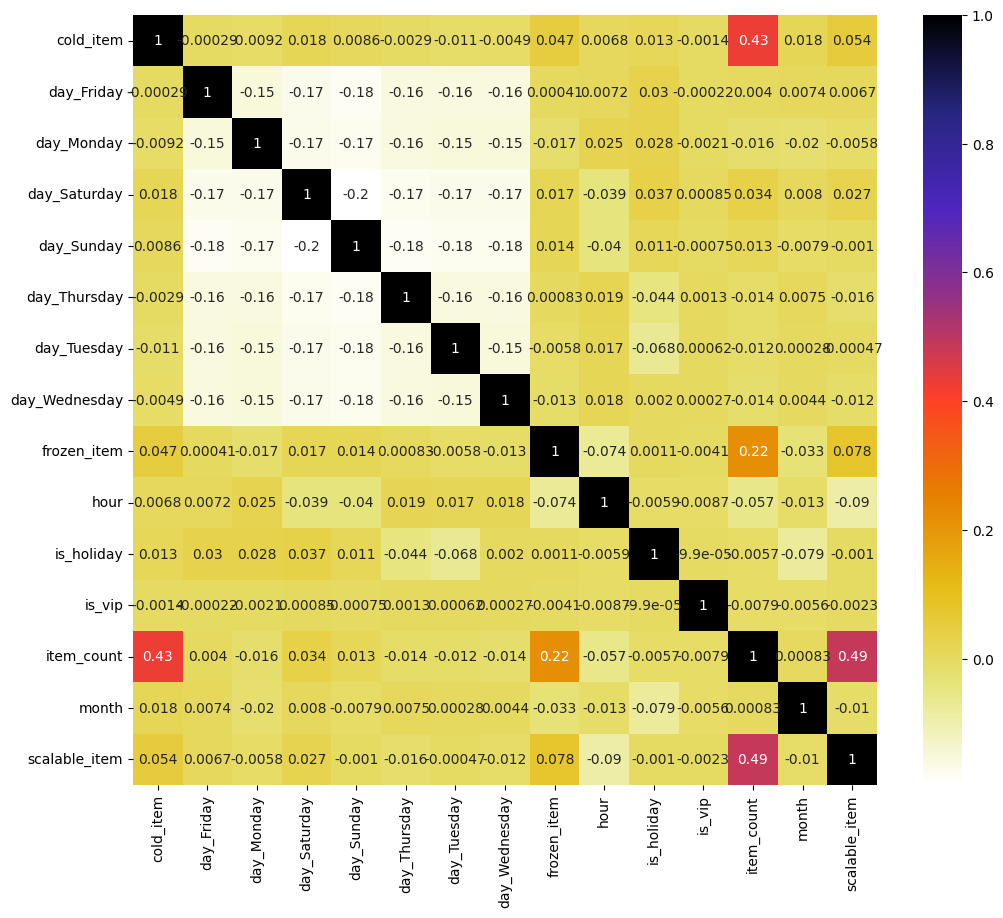

In [15]:
# Correlation matrix map
plt.figure(figsize=(12,10))
cor = X_train.corr() #method='pearson' or 'spearman'
sns.heatmap(cor,annot=True,cmap= plt.cm.CMRmap_r)
plt.show()

In [16]:
def correlation(dataset,threshold):
    col_corr = set() # set all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
# if we get the features that are highly correlated with each other, we can remove them
# corr_features = correlation(X_train,0.7)
# len(set(corr_features))
# corr_features

In [18]:
# Define hyperparameter grid
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}
# initialize the model
model = RandomForestRegressor(random_state=42)

In [19]:
grid_model = RandomizedSearchCV(model, parameters, n_iter=10, scoring='neg_mean_absolute_error', n_jobs=4, cv=5, verbose=3)
grid_model.fit(X_train, y_train)

# Get the best estimator
best_model = grid_model.best_estimator_

# make predictions
predictions = best_model.predict(X_test)

# Evaluate predictions
rmse = root_mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rsquared = r2_score(y_test, predictions)

p_accuracy = [(1 - np.abs(pred - actual) / actual) * 100 for pred, actual in zip(predictions, y_test)]

# Print P_accuracy
print("P_accuracy: Mean: %.2f%%, Min: %.2f%%, Max: %.2f%%" % (np.mean(p_accuracy), np.min(p_accuracy), np.max(p_accuracy)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-1.577 total time= 1.9min
[CV 1/5] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-1.575 total time= 1.9min
[CV 3/5] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-1.578 total time= 1.9min
[CV 4/5] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=-1.576 total time= 1.9min
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-1.549 total time= 1.7min
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-1.550 total time= 1.7min
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=-1.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.535 total time= 2.5min
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.536 total time= 2.3min
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.535 total time= 2.3min
[CV 1/5] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-1.541 total time= 1.4min
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.536 total time= 2.1min
[CV 2/5] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-1.541 total time= 1.2min
[CV 3/5] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=-1.541 total time= 1.2min
[CV 4/5] END max_depth=30, max_fea

In [20]:
print(grid_model.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [21]:
min_index = np.argmin(p_accuracy)
max_index = np.argmax(p_accuracy)
min_p_accuracy = p_accuracy[min_index]
corresponding_pred = predictions[min_index]
corresponding_actual = y_test.iloc[min_index]

print("Minimum P_accuracy: %.2f%%" % min_p_accuracy)
print("Corresponding Prediction:", corresponding_pred)
print("Corresponding Actual Value:", corresponding_actual)

Minimum P_accuracy: -108.69%
Corresponding Prediction: 4.681792020234285
Corresponding Actual Value: 1.5166666666666666


In [22]:
less_than_zero = [p_acc for p_acc in p_accuracy if p_acc < 0]
more_than_zero = [p_acc for p_acc in p_accuracy if p_acc > 0]

count_less_than_zero = len(less_than_zero)
count_more_than_zero = len(more_than_zero)

print(f"The total {count_more_than_zero} values are greater than 0%.")
print(f"The total {count_less_than_zero} values are less than 0%.")

The total 267361 values are greater than 0%.
The total 3612 values are less than 0%.


In [23]:
# Identify the indices of the 10 lowest P_accuracy values
worst_indices = np.argsort(p_accuracy)[:10]
max_indices = np.argsort(p_accuracy)[-10:]
# Extract the worst 10 features, predicted values, and actual values corresponding to the minimum P_accuracy
worst_features = X_test.iloc[worst_indices]
max_features = X_test.iloc[max_indices]
max_predicted_values = pd.Series(predictions[max_indices], name='Predicted')
worst_predicted_values = pd.Series(predictions[worst_indices], name='Predicted')
worst_actual_values = y_test.iloc[worst_indices].reset_index(drop=True)
max_actual_values = y_test.iloc[max_indices].reset_index(drop=True)

max_table = pd.concat([max_features.reset_index(drop=True), max_predicted_values, max_actual_values], axis=1)
# Create a DataFrame to display the features, predicted values, and actual values in a table
worst_table = pd.concat([worst_features.reset_index(drop=True), worst_predicted_values, worst_actual_values], axis=1)

# Print the table of the worst 10 features, predicted values, and actual values corresponding to the minimum P_accuracy
print("Worst 10 Features, Predicted Values, and Actual Values corresponding to Minimum P_accuracy:")
print(worst_table.to_string(index=False))
print('----------------------------------------------------------------------------------------')
print("Max 10 Features, Predicted Values, and Actual Values corresponding to Maximum P_accuracy:")
print(max_table.to_string(index=False))

Worst 10 Features, Predicted Values, and Actual Values corresponding to Minimum P_accuracy:
 cold_item  day_Friday  day_Monday  day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  frozen_item  hour  is_holiday  is_vip  item_count  month  scalable_item  Predicted  collection_duration
         2        True       False         False       False         False        False          False            0    21           0       0         2.0     12              0   4.681792             1.516667
         0       False        True         False       False         False        False          False            0    23           0       0         2.0      7              2   4.362411             1.500000
         0       False       False         False        True         False        False          False            1    12           0       0         2.0     10              1   4.386415             1.516667
         0        True       False         False       False         False  

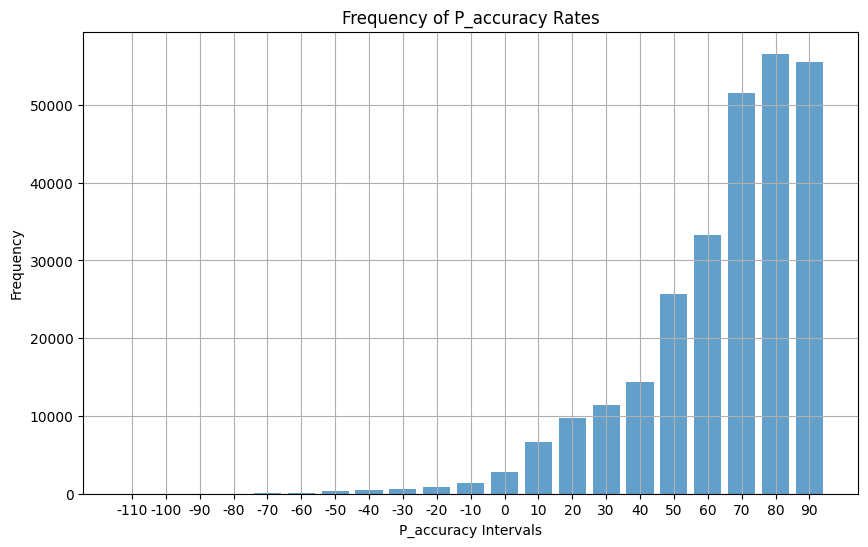

----------------------------------------------------------------------------------------
Interval: [-110%, -100%] - Frequency: 1
Interval: [-100%, -90%] - Frequency: 1
Interval: [-90%, -80%] - Frequency: 5
Interval: [-80%, -70%] - Frequency: 3
Interval: [-70%, -60%] - Frequency: 15
Interval: [-60%, -50%] - Frequency: 99
Interval: [-50%, -40%] - Frequency: 274
Interval: [-40%, -30%] - Frequency: 411
Interval: [-30%, -20%] - Frequency: 586
Interval: [-20%, -10%] - Frequency: 819
Interval: [-10%, 0%] - Frequency: 1398
Interval: [0%, 10%] - Frequency: 2813
Interval: [10%, 20%] - Frequency: 6578
Interval: [20%, 30%] - Frequency: 9753
Interval: [30%, 40%] - Frequency: 11398
Interval: [40%, 50%] - Frequency: 14363
Interval: [50%, 60%] - Frequency: 25716
Interval: [60%, 70%] - Frequency: 33204
Interval: [70%, 80%] - Frequency: 51484
Interval: [80%, 90%] - Frequency: 56586
Interval: [90%, 100%] - Frequency: 55466


In [24]:
#Scatter plots showing the frequency similarity from –100 to 100 by 10 percent intervals

# Define the intervals
intervals = np.arange(-110, 110, 10)

# Count the frequency of p_accuracy within each interval
frequency = []
for i in range(len(intervals)-1):
    count = ((p_accuracy >= intervals[i]) & (p_accuracy < intervals[i+1])).sum()
    frequency.append(count)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(intervals)-1), frequency, align='center', alpha=0.7)
plt.xticks(np.arange(len(intervals)-1), intervals[:-1])
plt.xlabel('P_accuracy Intervals')
plt.ylabel('Frequency')
plt.title('Frequency of P_accuracy Rates')
plt.grid(True)
plt.show()
print("----------------------------------------------------------------------------------------")
for i in range(len(intervals)-1):
    print("Interval: [%d%%, %d%%] - Frequency: %d" % (intervals[i], intervals[i+1], frequency[i]))

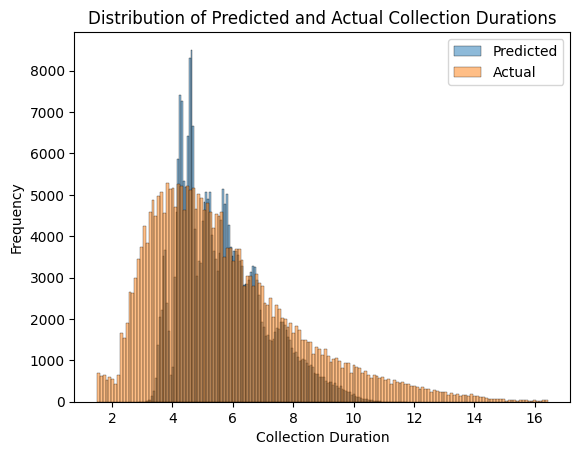

In [25]:
# Plot the distribution of predicted values

sns.histplot(predictions, alpha=0.5, label='Predicted')
sns.histplot(y_test, alpha=0.5, label='Actual')

plt.xlabel('Collection Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted and Actual Collection Durations')
plt.legend()
plt.show()

In [26]:
# get feature importances
importances = best_model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

          feature  importance
12     item_count    0.726350
14  scalable_item    0.114755
0       cold_item    0.072656
9            hour    0.028266
13          month    0.024349
8     frozen_item    0.021565
10     is_holiday    0.001796
3    day_Saturday    0.001707
4      day_Sunday    0.001603
7   day_Wednesday    0.001314
1      day_Friday    0.001242
5    day_Thursday    0.001236
2      day_Monday    0.001178
6     day_Tuesday    0.001118
11         is_vip    0.000865
